<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-15fbe6e00385>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


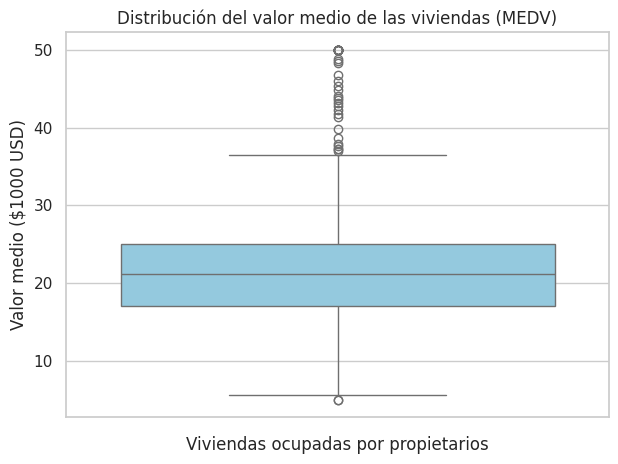

<ipython-input-6-2148714f99f0>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chas_counts.index, y=chas_counts.values, palette="pastel")


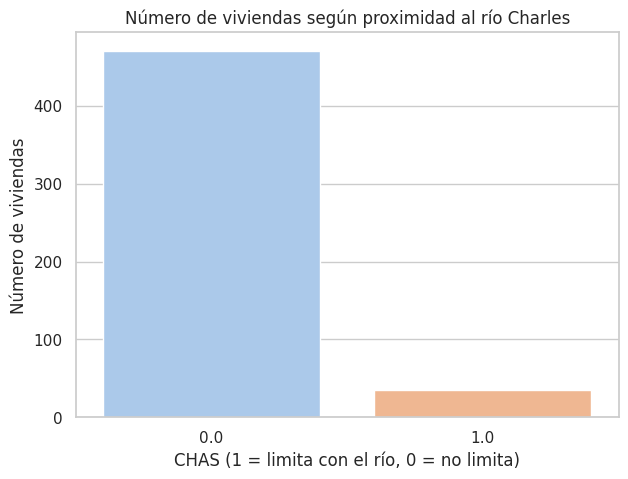

<ipython-input-6-2148714f99f0>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AGE_group", y="MEDV", data=df, palette="cool")


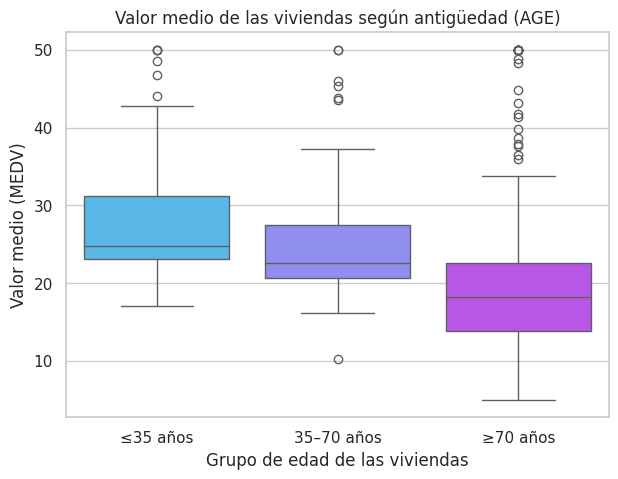

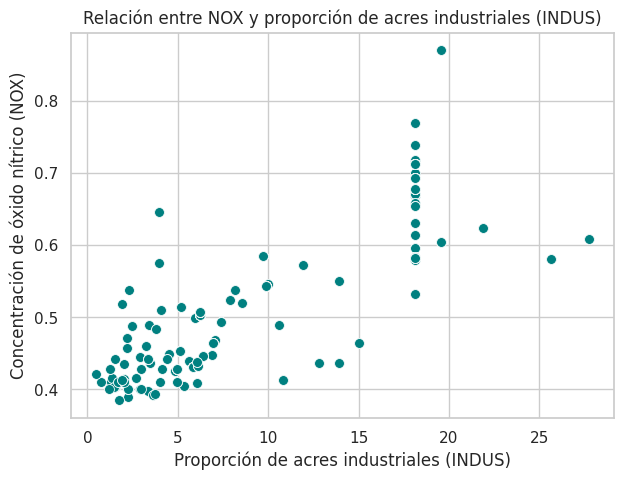

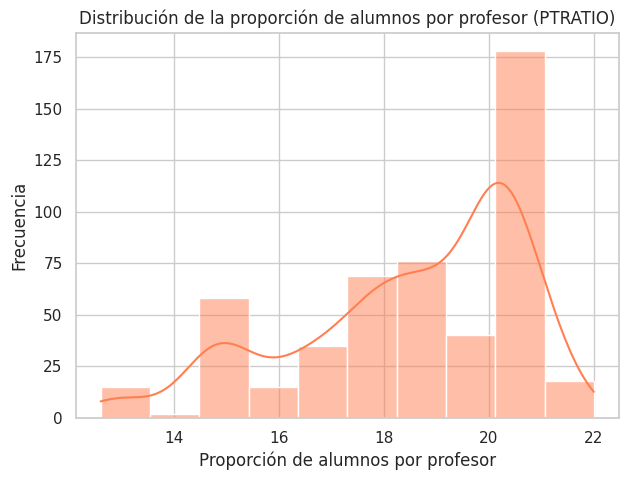

ANÁLISIS ESTADÍSTICO - Boston Housing

 PRUEBA T - Río Charles vs MEDV
T = 3.9964, p = 0.0001
→ Se rechaza H0: hay diferencia significativa en el valor medio de las casas.

 ANOVA - AGE vs MEDV


<ipython-input-6-2148714f99f0>:130: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_anova = anova_table["PR(>F)"][0]


                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
→ Se rechaza H0: hay diferencias significativas en el valor medio entre grupos de antigüedad.

 CORRELACIÓN DE PEARSON - NOX vs INDUS
Coeficiente de correlación r = 0.7637, p = 0.0000
→ Se rechaza H0: existe relación significativa entre NOX e INDUS.

4️⃣ REGRESIÓN LINEAL - DIS vs MEDV
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 19 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        23:59:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                      

In [6]:
alpha = 0.05

# ============================================
# Tarea 2 - Estadísticas descriptivas y visualizaciones
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (7, 5)

# ------------------------------------------------
# 1️⃣ Boxplot - Valor medio de las viviendas ocupadas por sus propietarios (MEDV)
# ------------------------------------------------
plt.figure()
sns.boxplot(y=df["MEDV"], color="skyblue")
plt.title("Distribución del valor medio de las viviendas (MEDV)")
plt.ylabel("Valor medio ($1000 USD)")
plt.xlabel("Viviendas ocupadas por propietarios")
plt.show()

# ------------------------------------------------
# 2️⃣ Diagrama de barras - Río Charles (CHAS)
# ------------------------------------------------
plt.figure()
chas_counts = df["CHAS"].value_counts().sort_index()
sns.barplot(x=chas_counts.index, y=chas_counts.values, palette="pastel")
plt.title("Número de viviendas según proximidad al río Charles")
plt.xlabel("CHAS (1 = limita con el río, 0 = no limita)")
plt.ylabel("Número de viviendas")
plt.show()

# ------------------------------------------------
# 3️⃣ Boxplot - MEDV frente a grupos de edad (AGE)
# ------------------------------------------------
# Discretizar la variable AGE en tres grupos
df["AGE_group"] = pd.cut(df["AGE"], bins=[0, 35, 70, 100],
                         labels=["≤35 años", "35–70 años", "≥70 años"])
plt.figure()
sns.boxplot(x="AGE_group", y="MEDV", data=df, palette="cool")
plt.title("Valor medio de las viviendas según antigüedad (AGE)")
plt.xlabel("Grupo de edad de las viviendas")
plt.ylabel("Valor medio (MEDV)")
plt.show()

# ------------------------------------------------
# 4️⃣ Diagrama de dispersión - NOX vs INDUS
# ------------------------------------------------
plt.figure()
sns.scatterplot(x="INDUS", y="NOX", data=df, color="teal", s=50)
plt.title("Relación entre NOX y proporción de acres industriales (INDUS)")
plt.xlabel("Proporción de acres industriales (INDUS)")
plt.ylabel("Concentración de óxido nítrico (NOX)")
plt.show()

# ------------------------------------------------
# 5️⃣ Histograma - Proporción de alumnos por profesor (PTRATIO)
# ------------------------------------------------
plt.figure()
sns.histplot(df["PTRATIO"], bins=10, kde=True, color="coral")
plt.title("Distribución de la proporción de alumnos por profesor (PTRATIO)")
plt.xlabel("Proporción de alumnos por profesor")
plt.ylabel("Frecuencia")
plt.show()

print("============================================")

print("ANÁLISIS ESTADÍSTICO - Boston Housing")

print("============================================")


# ------------------------------------------------

#  Prueba T para muestras independientes

# ¿Existe una diferencia significativa en el valor medio de las casas (MEDV)

# delimitadas por el río Charles (CHAS)?

# ------------------------------------------------

print("\n PRUEBA T - Río Charles vs MEDV")

chas_1 = df[df['CHAS'] == 1]['MEDV']

chas_0 = df[df['CHAS'] == 0]['MEDV']



t_stat, p_val = stats.ttest_ind(chas_1, chas_0)

print(f"T = {t_stat:.4f}, p = {p_val:.4f}")

if p_val < alpha:

    print("→ Se rechaza H0: hay diferencia significativa en el valor medio de las casas.")

else:

    print("→ No se rechaza H0: no hay diferencia significativa en el valor medio.")



# ------------------------------------------------

#  ANOVA

# ¿Existe alguna diferencia en los valores medios de las casas (MEDV)

# para cada proporción de AGE (propiedades construidas antes de 1940)?

# ------------------------------------------------

print("\n ANOVA - AGE vs MEDV")

# Crear grupos por rangos de antigüedad

df['AGE_group'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['Bajo', 'Medio', 'Alto'])




anova_model = ols('MEDV ~ C(AGE_group)', data=df).fit()

anova_table = sm.stats.anova_lm(anova_model, typ=2)

p_anova = anova_table["PR(>F)"][0]

print(anova_table)

if p_anova < alpha:

    print("→ Se rechaza H0: hay diferencias significativas en el valor medio entre grupos de antigüedad.")

else:

    print("→ No se rechaza H0: no hay diferencias significativas entre los grupos.")



# ------------------------------------------------

# Correlación de Pearson

# ¿Existe relación entre la concentración de óxido nítrico (NOX)

# y la proporción de acres comerciales no minoristas por ciudad (INDUS)?

# ------------------------------------------------



print("\n CORRELACIÓN DE PEARSON - NOX vs INDUS")

corr, p_corr = stats.pearsonr(df['NOX'], df['INDUS'])

print(f"Coeficiente de correlación r = {corr:.4f}, p = {p_corr:.4f}")

if p_corr < alpha:

    print("→ Se rechaza H0: existe relación significativa entre NOX e INDUS.")

else:

    print("→ No se rechaza H0: no hay relación significativa entre NOX e INDUS.")



# ------------------------------------------------

#  Regresión lineal

# ¿Cuál es el impacto de la distancia (DIS) a los centros de empleo sobre MEDV?

# ------------------------------------------------

print("\n4️⃣ REGRESIÓN LINEAL - DIS vs MEDV")

reg_model = ols('MEDV ~ DIS', data=df).fit()
print(reg_model.summary())



p_reg = reg_model.pvalues['DIS']

if p_reg < alpha:

    print("→ Se rechaza H0: la distancia tiene un impacto significativo sobre el valor medio de las viviendas.")

else:

    print("→ No se rechaza H0: la distancia no tiene un impacto significativo sobre el valor medio de las viviendas.")

In [ ]:
# Hipotesis Nula: no hay diferencia significativa en el valor medio.

# El p-value es menor que alpha p < 0.05)
# Decisión: Se rechaza la hipótesis nula (H0).
# Conclusión: Se concluye que la distancia ponderada a los centros de empleo (DIS) 
# tiene un impacto lineal estadísticamente significativo en el valor medio de las viviendas. 
# El coeficiente obtenido  representa la magnitud y dirección de ese impacto.

#Explicacion: El coeficiente es positivo (+1.0916).
#Magnitud: Por cada aumento de una unidad en la distancia ponderada a los centros de empleo (DIS)
# , se espera que el valor medio de las viviendas (MEDV) aumente en 1.0916 unidades de 1000.
# En términos monetarios: El valor medio de la vivienda aumenta aproximadamente en 1091.60 ($1.0916 \times 1000$).







